In [1]:
import matplotlib.pyplot as plt
from PIL import Image

from pycocotools.coco import COCO
from pycocotools.mask import decode

In [3]:
# Put your SUNRGBD root directory here
dataset_root = ''

# Demo for how to use coco formatted SUNRGBD data

## Loading json files using pycocotools

In [19]:
sunrgbd = COCO('instances_test.json')

loading annotations into memory...
Done (t=0.44s)
creating index...
index created!


If you run into an encoding error, use the following snippet to re-encode the json file 

In [18]:
with open('instances_test.json', 'r', encoding='iso-8859-1') as f:
    jsonstr = f.read()

with open('instances_test.json', 'w') as f:
    f.write(jsonstr)

## Categories

The first 38 categories correspond to the seg37list plus an unknown label 

In [20]:
for x in range(38):
    print(sunrgbd.cats[x]['name'])

unknown
wall
floor
cabinet
bed
chair
sofa
table
door
window
bookshelf
picture
counter
blinds
desk
shelves
curtain
dresser
pillow
mirror
floor mat
clothes
ceiling
books
fridge
tv
paper
towel
shower curtain
box
whiteboard
person
nightstand
toilet
sink
lamp
bathtub
bag


In the seglistall labels, the categories are very noisy with numerous misspellings. I used a spellcheck to correct many of these misspellings. The correspondance between the original labels and the clean label is present in the fields 'seglist_all_name' and 'seglist_all_id'.

In [6]:
for x in sunrgbd.getCatIds('bookshelf'):
    print(sunrgbd.cats[x])

{'supercategory': 'bookshelf', 'id': 10, 'name': 'bookshelf', 'seglist_all_name': 'bookshelf', 'seglist_all_id': 477}
{'supercategory': 'books', 'id': 23, 'name': 'books', 'seglist_all_name': 'books', 'seglist_all_id': 476}
{'supercategory': [], 'id': 38, 'name': 'shelf', 'seglist_all_name': 'shelf', 'seglist_all_id': 4809}
{'supercategory': [], 'id': 64, 'name': 'book', 'seglist_all_name': 'book', 'seglist_all_id': 452}
{'supercategory': 'books', 'id': 1241, 'name': 'books', 'seglist_all_name': 'boks', 'seglist_all_id': 447}
{'supercategory': 'bookshelf', 'id': 1242, 'name': 'bookshelf', 'seglist_all_name': 'bookshelve', 'seglist_all_id': 478}
{'supercategory': [], 'id': 1655, 'name': 'shelf', 'seglist_all_name': 'shalf', 'seglist_all_id': 4778}
{'supercategory': [], 'id': 1656, 'name': 'shelf', 'seglist_all_name': 'top_with_shelf_with_door', 'seglist_all_id': 5667}
{'supercategory': [], 'id': 2139, 'name': 'boo', 'seglist_all_name': 'boo', 'seglist_all_id': 451}
{'supercategory': [],

## Images

In [7]:
imgIDs = sunrgbd.getImgIds(catIds=[10]) # Get all bookshelf images
print("Number of images containing bookshelf: {}".format(len(imgIDs)))
print(sunrgbd.imgs[imgIDs[0]])

Number of images containing bookshelf: 1
{'file_name': 'SUNRGBD/kv2/kinect2data/000015_2014-05-26_14-37-33_260595134347_rgbf000020-resize/image/0000020.jpg', 'depth_file_name': 'SUNRGBD/kv2/kinect2data/000015_2014-05-26_14-37-33_260595134347_rgbf000020-resize/depth/0000020.png', 'height': 530, 'width': 730, 'id': 10}


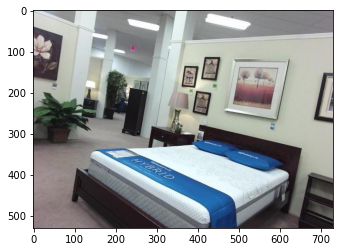

In [8]:
I = Image.open(dataset_root + sunrgbd.imgs[imgIDs[0]]['file_name'])
plt.imshow(I)
plt.show()

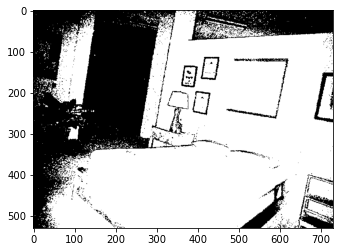

In [10]:
D = Image.open(dataset_root + sunrgbd.imgs[imgIDs[0]]['depth_file_name']) # SUNRGBD also includes a depth image
plt.imshow(D)
plt.show()

## Annotations

Let's find the bookshelf annotation in this image

In [11]:
annId = sunrgbd.getAnnIds(imgIds=10, catIds=10) # Get the bookshelf annotation for image 10
print(sunrgbd.anns[annId[0]])

{'category_id': 10, 'area': 9275, 'bbox': [647, 395, 83, 135], 'id': '10_7_seg', 'image_id': 10, 'mask_name': 'SUNRGBD/kv2/kinect2data/000015_2014-05-26_14-37-33_260595134347_rgbf000020-resize', 'segmentation': {'size': [530, 730], 'counts': 'hk^:5X`05K5K5K5K5K5K5K5K5K5K5K5K5K5K5K5K5K5K5K5K5_OcLhCc3V<^LeCg3Z<900O1O1O100O1O1O1000000001O00001O00001O0000001O00001O00001O0000001O00001O00001O0000001O00001O00001O0000001O00001O00001O'}, 'iscrowd': False}


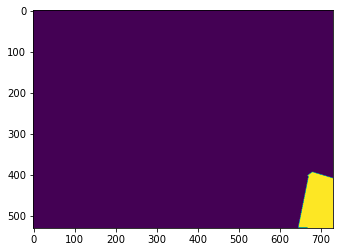

In [12]:
mask = decode(sunrgbd.anns[annId[0]]['segmentation']) # Decode the RLE encoding
plt.imshow(mask)
plt.show()